# Reinforcement Learning Project

Group:
- Afonso Ascensão 20240684
- Afonso
- Elcano
- Osmainy Raimundo - e20191506

## The Environment

Blackjack is a card game where the goal is to beat the dealer by obtaining cards that sum to closer to 21 (without going over 21) than the dealers cards.

- Description:
The game starts with the dealer having one face up and one face down card, while the player has two face up cards. All cards are drawn from an infinite deck (i.e. with replacement).

The card values are:

Face cards (Jack, Queen, King) have a point value of 10.

Aces can either count as 11 (called a ‘usable ace’) or 1.

Numerical cards (2-10) have a value equal to their number.

The player has the sum of cards held. The player can request additional cards (hit) until they decide to stop (stick) or exceed 21 (bust, immediate loss).

After the player sticks, the dealer reveals their facedown card, and draws cards until their sum is 17 or greater. If the dealer goes bust, the player wins.

If neither the player nor the dealer busts, the outcome (win, lose, draw) is decided by whose sum is closer to 21.

This environment corresponds to the version of the blackjack problem described in Example 5.1 in Reinforcement Learning: An Introduction by Sutton and Barto [1].

![Agent Playing BlackJack](blackjack.gif)

## The Agent

## State and Actions

Action Space
- The action shape is (1,) in the range {0, 1} indicating whether to stick or hit.

0: Stick

1: Hit

Observation Space
- The observation consists of a 3-tuple containing: the player’s current sum, the value of the dealer’s one showing card (1-10 where 1 is ace), and whether the player holds a usable ace (0 or 1).

The observation is returned as (int(), int(), int()).

## Reward

Win: +1 reward
The player receives a reward of +1 when they win the game (e.g., the dealer busts or the player's final sum is higher than the dealer's without busting).

Draw: 0 reward
A 0 reward is given when the game ends in a tie (i.e., the player and dealer have the same sum).

Loss: -1 reward
The player receives a reward of -1 when they lose the game (e.g., busting or having a lower sum than the dealer).

Reward Type: Sparse and delayed
Rewards are only given at the end of each episode. There is no intermediate reward for each action taken.

# Table of Contents

# Imports

In [14]:
! pip install gym[atari,accept-rom-license] ale-py==0.8.1 autorom==0.4.2


  Using cached ale_py-0.8.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
Using cached ale_py-0.8.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.7 MB)
  Attempting uninstall: ale-py
    Found existing installation: ale-py 0.11.1
    Uninstalling ale-py-0.11.1:
      Successfully uninstalled ale-py-0.11.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.1.2 requires ale-py>=0.10.1, but you have ale-py 0.8.1 which is incompatible.
dopamine-rl 4.1.2 requires gym<=0.25.2, but you have gym 0.26.2 which is incompatible.


In [13]:
!pip install gymnasium matplotlib numpy

In [15]:
! pip install stable-baselines3[extra]

  Using cached ale_py-0.11.1-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (9.0 kB)
Using cached ale_py-0.11.1-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (4.6 MB)
  Attempting uninstall: ale-py
    Found existing installation: ale-py 0.8.1
    Uninstalling ale-py-0.8.1:
      Successfully uninstalled ale-py-0.8.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.1.2 requires gym<=0.25.2, but you have gym 0.26.2 which is incompatible.


In [40]:
import gym
import matplotlib.pyplot as plt
from pprint import pprint
import numpy as np
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from collections import defaultdict
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import ListedColormap, BoundaryNorm
import random
from stable_baselines3 import DQN
from stable_baselines3.common.evaluation import evaluate_policy
import time

# Monte Carlo

The Monte Carlo algorithm is a reinforcement learning method that estimates the value of states or state-action pairs by averaging the returns obtained from multiple episodes of experience. Unlike dynamic programming, Monte Carlo methods do not require a complete model of the environment; instead, they rely on sample episodes generated through interaction with the environment. This makes them particularly useful for problems where the transition dynamics are unknown or too complex to model explicitly.

In the context of Blackjack, Monte Carlo methods are effective because the game has a well-defined episode structure (each game is a finite sequence of decisions ending in a terminal state). This allows the algorithm to learn optimal policies by simulating many hands of Blackjack and updating action-value estimates based on actual outcomes, eventually converging to strategies that maximize expected reward.

```
# Isto está formatado como código
```



🚀 Starting training with 500,000 episodes...
   Episode 1,000: Recent avg reward: -0.208, States: 227
   Episode 2,000: Recent avg reward: -0.186, States: 265
   Episode 3,000: Recent avg reward: -0.214, States: 275
   Episode 4,000: Recent avg reward: -0.150, States: 277

📊 Episode 5,000/500,000 (1.0%)
   Overall: W:1,917 L:2,791 T:292 | Win Rate: 38.34%
   Last 5k: Avg Reward: -0.175 | Win Rate: 38.34%
   States explored: 277
   Episode 6,000: Recent avg reward: -0.137, States: 280
   Episode 7,000: Recent avg reward: -0.094, States: 280
   Episode 8,000: Recent avg reward: -0.072, States: 280
   Episode 9,000: Recent avg reward: -0.114, States: 280

📊 Episode 10,000/500,000 (2.0%)
   Overall: W:3,981 L:5,396 T:623 | Win Rate: 39.81%
   Last 5k: Avg Reward: -0.108 | Win Rate: 41.28%
   States explored: 280
   Episode 11,000: Recent avg reward: -0.140, States: 280
   Episode 12,000: Recent avg reward: -0.121, States: 280
   Episode 13,000: Recent avg reward: -0.177, States: 280
   Epi

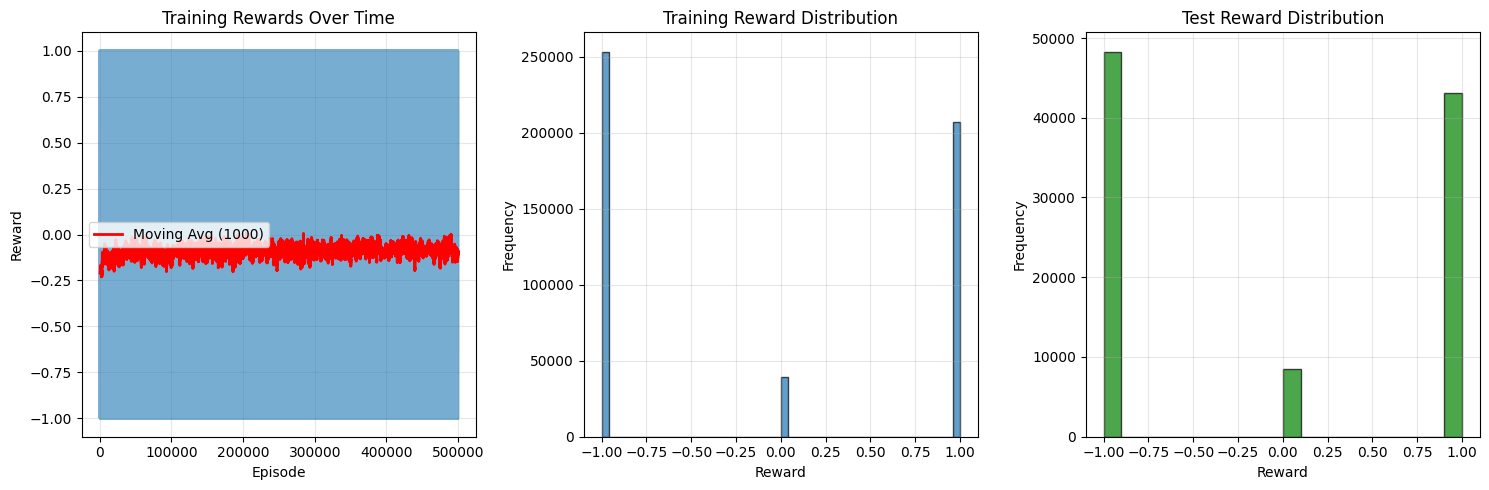

Training and testing complete!
Final training average: -0.105
Test average: -0.051


In [48]:
class MonteCarloAgent:
    """Monte Carlo agent for Blackjack using Gymnasium environment"""

    def __init__(self, epsilon=0.1):
        self.epsilon = epsilon
        self.Q = defaultdict(lambda: np.zeros(2))
        self.returns = defaultdict(list)
        self.policy = defaultdict(int)

    def get_action(self, state, training=True):
        """Epsilon-greedy action selection"""
        if training and np.random.random() < self.epsilon:
            return np.random.choice([0, 1])
        else:
            return np.argmax(self.Q[state])

    def update_policy(self, state):
        """Update policy to be greedy w.r.t. current Q-values"""
        self.policy[state] = np.argmax(self.Q[state])

    def monte_carlo_update(self, episode):
        """Update Q-values using first-visit Monte Carlo method"""
        states, actions, rewards = zip(*episode)

        # Calculate returns (no discounting for episodic tasks)
        G = 0
        gamma = 1.0

        # Work backwards through episode
        for t in reversed(range(len(episode))):
            state, action, reward = states[t], actions[t], rewards[t]
            G = gamma * G + reward

            # First-visit Monte Carlo
            if (state, action) not in [(s, a) for s, a, r in episode[:t]]:
                self.returns[(state, action)].append(G)
                self.Q[state][action] = np.mean(self.returns[(state, action)])
                self.update_policy(state)


def run_episode(env, agent, training=True):
    """Run a single episode using Gymnasium environment"""
    episode = []
    state, _ = env.reset()

    while True:
        action = agent.get_action(state, training)
        next_state, reward, terminated, truncated, _ = env.step(action)
        episode.append((state, action, reward))

        if terminated or truncated:
            break

        state = next_state

    return episode


def train_monte_carlo(episodes=5000000, epsilon=0.1):
    """Train Monte Carlo agent on Gymnasium Blackjack"""
    print(f"Starting training with {episodes:,} episodes...")

    env = gym.make('Blackjack-v1', sab=True)  # sab=True for more realistic rewards
    agent = MonteCarloAgent(epsilon=epsilon)

    episode_rewards = []
    wins = 0
    losses = 0
    ties = 0

    for i in range(episodes):
        episode = run_episode(env, agent, training=True)
        agent.monte_carlo_update(episode)

        # Track performance
        total_reward = sum([reward for _, _, reward in episode])
        episode_rewards.append(total_reward)

        # Track wins/losses/ties
        if total_reward > 0:
            wins += 1
        elif total_reward < 0:
            losses += 1
        else:
            ties += 1

        # Print detailed progress
        if (i + 1) % 5000 == 0:
            avg_reward = np.mean(episode_rewards[-5000:])
            win_rate = wins / (i + 1) * 100
            recent_win_rate = sum(1 for r in episode_rewards[-5000:] if r > 0) / min(5000, i + 1) * 100

            print(f"\n📊 Episode {i+1:,}/{episodes:,} ({((i+1)/episodes)*100:.1f}%)")
            print(f"   Overall: W:{wins:,} L:{losses:,} T:{ties:,} | Win Rate: {win_rate:.2f}%")
            print(f"   Last 5k: Avg Reward: {avg_reward:.3f} | Win Rate: {recent_win_rate:.2f}%")
            print(f"   States explored: {len(agent.Q):,}")

        elif (i + 1) % 1000 == 0:
            recent_avg = np.mean(episode_rewards[-1000:])
            print(f"   Episode {i+1:,}: Recent avg reward: {recent_avg:.3f}, States: {len(agent.Q):,}")

    env.close()
    print("Training completed!")
    return agent, episode_rewards


def test_agent(agent, episodes=1000):
    """Test the trained agent"""
    print(f"Testing agent over {episodes} episodes...")

    env = gym.make('Blackjack-v1', sab=True)
    test_rewards = []
    wins = 0

    for i in range(episodes):
        episode = run_episode(env, agent, training=False)
        total_reward = sum([reward for _, _, reward in episode])
        test_rewards.append(total_reward)
        if total_reward > 0:
            wins += 1

    env.close()

    avg_reward = np.mean(test_rewards)
    win_rate = wins / episodes * 100

    print(f"Test Results:")
    print(f"   Average Reward: {avg_reward:.3f}")
    print(f"   Win Rate: {win_rate:.2f}%")
    print(f"   Total States Learned: {len(agent.Q):,}")

    return test_rewards


def plot_results(episode_rewards, test_rewards=None):
    """Plot training and test results"""
    plt.figure(figsize=(15, 5))

    # Training rewards
    plt.subplot(1, 3, 1)
    plt.plot(episode_rewards, alpha=0.6)

    # Calculate and plot moving average
    window_size = min(1000, len(episode_rewards) // 10)
    if len(episode_rewards) >= window_size:
        moving_avg = np.convolve(episode_rewards, np.ones(window_size)/window_size, mode='valid')
        plt.plot(range(window_size-1, len(episode_rewards)), moving_avg, 'r-', linewidth=2, label=f'Moving Avg ({window_size})')
        plt.legend()

    plt.title('Training Rewards Over Time')
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.grid(True, alpha=0.3)

    # Training reward distribution
    plt.subplot(1, 3, 2)
    plt.hist(episode_rewards, bins=50, alpha=0.7, edgecolor='black')
    plt.title('Training Reward Distribution')
    plt.xlabel('Reward')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)

    # Test results (if provided)
    if test_rewards is not None:
        plt.subplot(1, 3, 3)
        plt.hist(test_rewards, bins=20, alpha=0.7, color='green', edgecolor='black')
        plt.title('Test Reward Distribution')
        plt.xlabel('Reward')
        plt.ylabel('Frequency')
        plt.grid(True, alpha=0.3)
    else:
        plt.subplot(1, 3, 3)
        plt.text(0.5, 0.5, 'No test data\navailable', ha='center', va='center', transform=plt.gca().transAxes)
        plt.title('Test Results')

    plt.tight_layout()
    plt.show()


# Actually run the training and testing
if __name__ == "__main__":
    # Train the agent
    trained_agent, training_rewards = train_monte_carlo(episodes=500000, epsilon=0.1)

    # Test the agent
    test_results = test_agent(trained_agent, episodes=100000) # 20% of total episodes

    # Plot results
    plot_results(training_rewards, test_results)

    print("Training and testing complete!")
    print(f"Final training average: {np.mean(training_rewards[-1000:]):.3f}")
    print(f"Test average: {np.mean(test_results):.3f}")